# <h1>**Problem Statement**
---
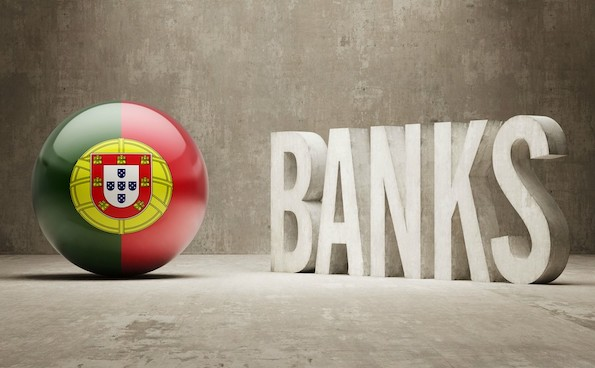
**<br><h3>Abstract**
***

***Term Deposit*** is one of many investment instruments that people tend to have. It is because less risky, fixed interest upon agreement, and provided by a legal institution called bank. 

Unfortunately, marketing campaign result of a **Portuguese Banking Institution in 2008 - 2010** tells the opposite. Portuguese tend not to open term deposit due to the *Great Recession* strike in Portugal during that period. 

It had made Portuguese Bank **struggled** since only a few people wanted to open a term deposit. \

**<br><h3>Business Problem** 
***

1. What kind of **customer charateristics** the marketing should target in order to increase term deposit opening? \

2. Are there any **specific conditions** that affect customer to open term deposit? \

**<br><h3>Business Objective** 
***

The objective of this project is to **analyze the features or conditions of a customer charateristic** which marketing team should target in order to increase their term deposit opening. \

**<br><h3>Machine Learning Task** 
***

- This project will use **supervised machine learning algorithm** because the result (label) campaign already given in the dataset.
- Utilizing **classification** algorithm to answer the business problems.
- Analyze **feature importance** of the dataset to produce the best model. \

**<br><h3>Performance Measurement** 
***

In order to measure the performance of the classification model, we use the following metrics: 
- **Precision**
- **ROC - AUC**

# <h1>**Data Understanding**
---
The dataset describes Portugal bank marketing campaigns results from **May 2008 to November 2010**. 

Conducted campaigns were based mostly on direct phone calls, offering bank's clients to place a term deposit. 

If after all marketing afforts client had agreed to place deposit - target variable marked **'yes'**, otherwise **'no'**.

**<br><h3>Data Source**
***
This dataset can be downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing) or [Kaggle](https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset).

<br> **<h3>Citation Request**:
***
This dataset is public available for research. The details are described in [Moro et al., 2014]. 

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## **Feature and Target Description**

| <h4>Field          | <h4>Description                                                                           | <h4>Data Type |
| -------------- | ------------------------------------------------------------------------------------- | ---------|
| **<h5>Bank Client Data**                                                                                   
| age            | Age | Int |
| job            | Type of job                                                   | Categorical |
| marital        | Marital status| Categorical |
| education      | Education background                                       | Categorical |
| default        | Does customer have credit in default?               | Categorical |
| housing        | Does customer have housing? loan                                                                     | Categorical |
| loan           | Does customer have personal loan? | Categorical
| **<h5>Last Contact Details related to Campaign** |
| contact        | Communication type                                                              | Categorical |
| month          | Last contact month                                                              | Categorical |
| day_of_week         | Last contact day of the week                                                             | Categorical |
| duration       |   Last contact duration (in seconds)                                                             | Int |
| **<h5>Attributes**                                                           |
| campaign        |  Number of contacts performed during this campaign and for this client (includes last contact)                                                              | Int |
| pdays        | Number of days that passed by after the client was last contacted from a previous campaign                                                              | Int |
| previous          | Number of contacts performed before this campaign and for this client (numeric)                                                             | Int |
| poutcome          | Outcome of the previous marketing campaign                                                                | Categorical |
| **<h5>Socio Economic Attr**                                                           |
| emp.var.rate       | Employment variation rate : Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy| Int|
| cons.price.idx | Consumer price index  :  measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services | Int|
| cons.conf.idx | Consumer confidence index : measures how optimistic or pessimistic consumers are regarding their expected financial situation | Int|
| euribor3m | Euribor 3 month rate - daily indicator :  the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans | Int|
| nr.employed | Number of employees - quarterly indicator| Int|
| **<h5>y** | **<h5>Target prediction** | 

# <h1>**Import Libraries**
---
Import necessary Python package to tackle the data science problem:
- **Data handling**: Numpy and Pandas
- **Data visualization**: Seaborn, Matplotlib, Plotly, MissingNo
- **Data splitting and Modelling**: Scikit-Learn, Scipy, JcopML
- **Data augmentation**: Imbalance Learn

In [ ]:
!pip install category_encoders

In [ ]:
#For handling dataset
import numpy as np
import pandas as pd

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import missingno as msno

#For counting time and progress
import time
from tqdm import tqdm

#Disable warning
import warnings
warnings.filterwarnings("ignore")

#For data splitting and tuning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

#For checking multicolinearity
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import category_encoders as ce

#For handling imbalance data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

#For data modelling
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

#For checking model performance 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# <h1>**Import Dataset**
---
Dataset is in `.csv` format with `;` as seperation method, therefore Pandas `read_csv` library is used to import the dataset

In [ ]:
raw_data_link = 'https://raw.githubusercontent.com/PurwadhikaDev/DataWarrior_JC_DS_AH_6_FinalProject-/main/bank-additional-full.csv'
bank = pd.read_csv(raw_data_link, sep = ';')
display(bank.head())
print('There is {} observations with {} features'.format(bank.shape[0], bank.shape[1]))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There is 41188 observations with 21 features


# <h1>**Basic Data Overview**
---
Performing preliminary data overview to gain highlevel insight of the dataset:
- Missing data checking and plotting using `missingno`
- Descriptive value analyzing
- Reviewing data boundaries

## **Missing Value Analysis**
---


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

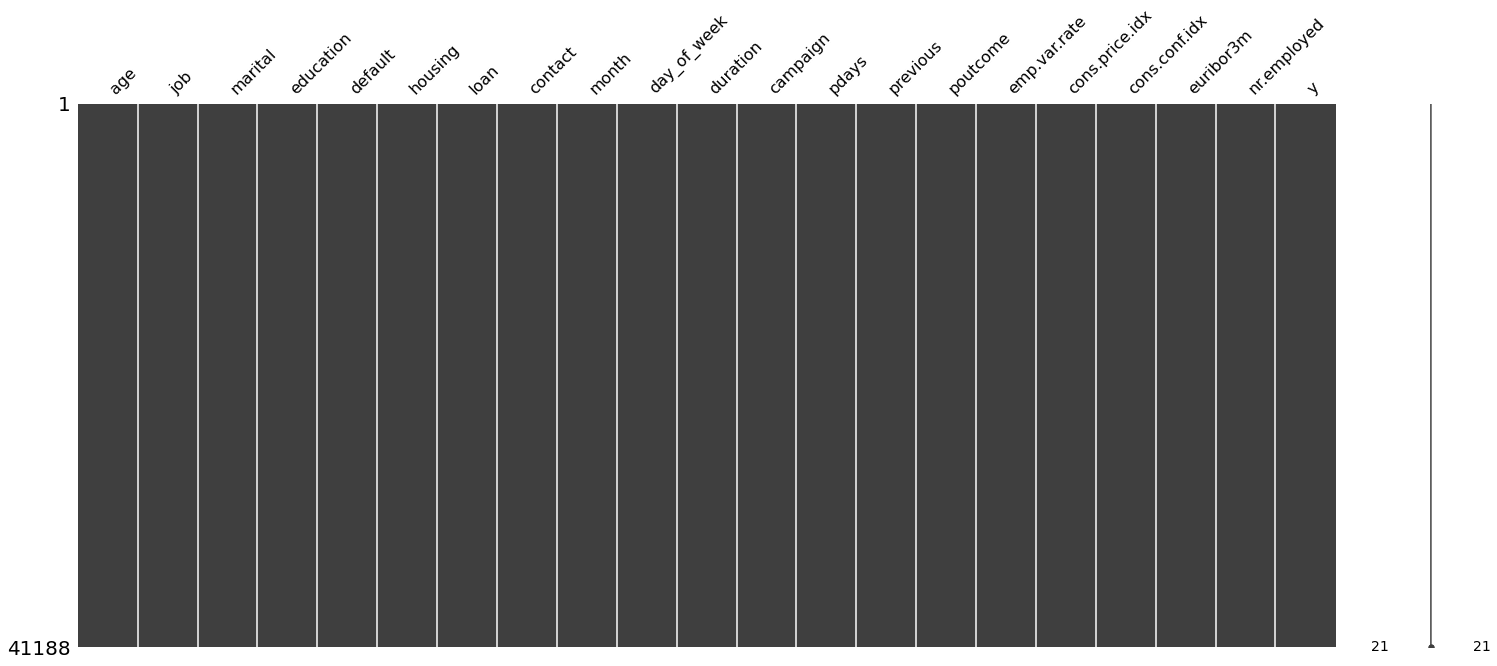

In [ ]:
msno.matrix(bank)

The dataset contains no **missing value**, fortunately. Therefore, step of imputing data, which will be filled with median, mean, or mode, can be neglected until further **EDA**

In [ ]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
bank.describe(include = object).transpose()

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


## **Summary**:
---
- **Mean Age** is approximately 40 years old. (Minimum: 17 years old and Maximum: 98 years old)
- The numerical data have **different scales** across the dataset, therefore scaler pre-processing should be taken into account during the data pre-processing
- **"campaign"**, **"age"**, and **"cons.conf.idx"** features are having big differences between Q3 (75%) and max value. Need to be checked further for this outliers
- There are **some clients have not been contacted** during the previous campaign denoted by he value '999' in pdays column
- There is an possibility for **categorical data to be processed as an ordinal value**


**Notes**:

1. Portugal has different public school regulation, and only need to fulfill the 'basic 4 years'
  - Age 3 - 5 : Kindergarten \
  - Age 6 - 9 : First Cycle (Primary Education) (Language + Environment + Math + Artistic + Physical + Music + Religious) \
  - Age 10 - 11 : Second Cycle (like Primary School) \
  - Age 12 - 14 : Third Cycle (like Junior High School) \
  - Age 15 - 17 : Secondary Education (like Senior High school / Professional Programmes (Vocational High School) \
2. Most of the descriptive data is located **not in the "numeric"** columns but **in the "categorical"** columns

# **<h1>Exploratory Data Analysis (EDA)**

## **Imbalance Dataset Check**
---
Checking whether the dataset has a balance or imbalance data.

Imbalance means that the label or **the campaign outcome tends to have more value in one result** (mostly did not subscribed to the term deposit).

**<br>Result:**

- **Imbalance dataset** with 88.7% : 11.3% for campaign result.
- **Under sampling** and **over sampling** must be applied to the dataset.

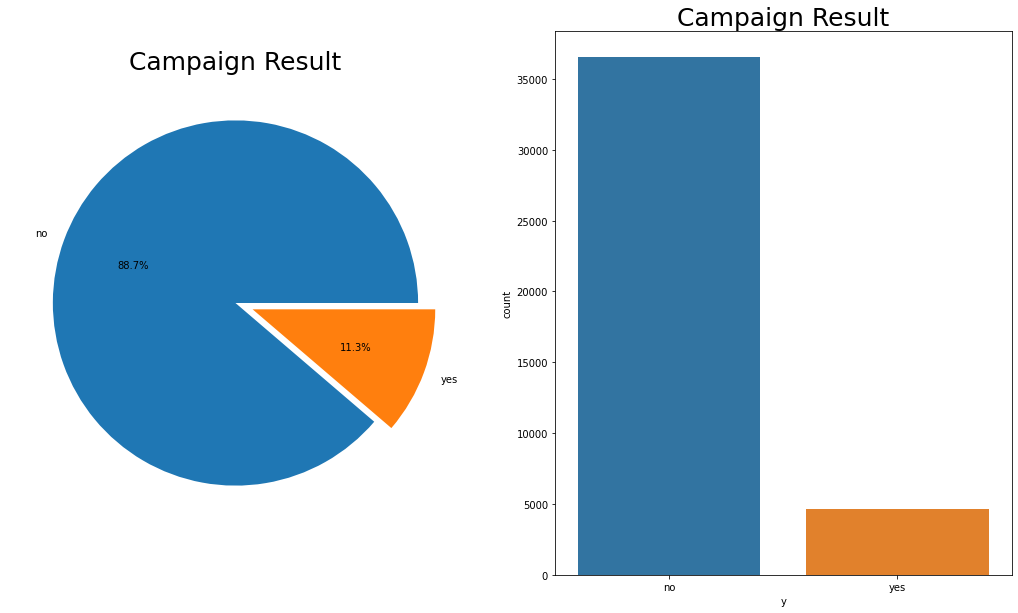

In [ ]:
f,ax = plt.subplots(1,2,figsize = (18,10))
bank['y'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('Campaign Result', fontsize = 25)
ax[0].set_ylabel('')
sns.countplot('y', data = bank, ax = ax[1])
ax[1].set_title('Campaign Result', fontsize = 25)
plt.show()

## **Categorical Data Exploration**
---
Checking whether the categorical data can be treated as an ordinal value.

- There are **'unknown'** data in features 'job', 'marital', 'education', 'default', 'housing', and 'loan' which will be treated as **missing value**.
- The missing value will be **filled with mode value** (higher frequency of each feature). 
- 'day_of_week' feature shows that previous calls are **held during weekdays**.
- 'month' feature shows that previous calls are **not held in January and February**.
- 'education' features will be treated as **ordinal** during encoding process

In [ ]:
bank_obj = (bank.select_dtypes(include=object)).columns
for column in bank_obj:
  print(column, bank[column].unique(), sep = '\n')
  print('--'*40)

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
--------------------------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------------------------------------
default
['no' 'unknown' 'yes']
--------------------------------------------------------------------------------
housing
['no' 'yes' 'unknown']
--------------------------------------------------------------------------------
loan
['no' 'yes' 'unknown']
--------------------------------------------------------------------------------
contact
['telephone' 'cellular']
--------------------------------------------------------------

### **Categorical Data Visualization**
---
Perform **categorical vs target** data visualization

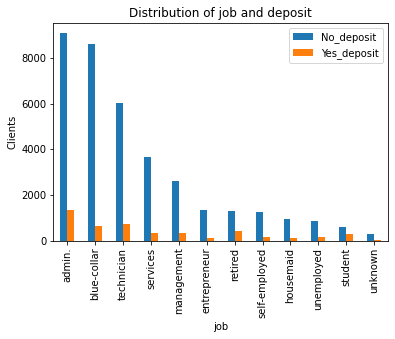

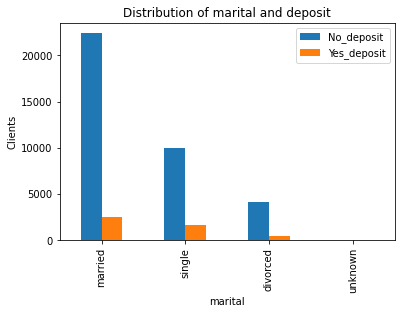

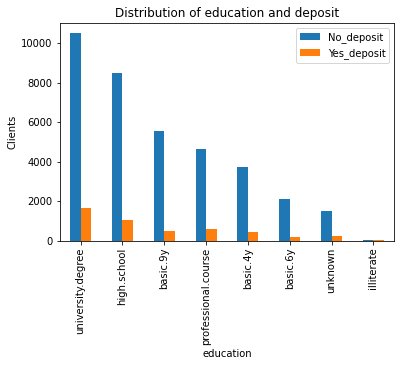

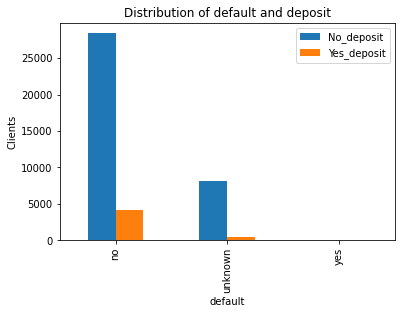

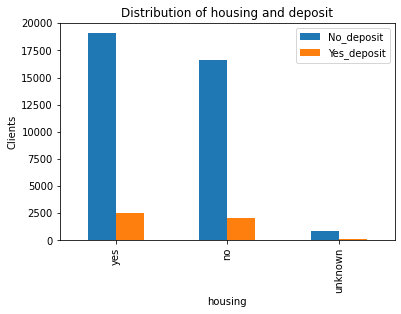

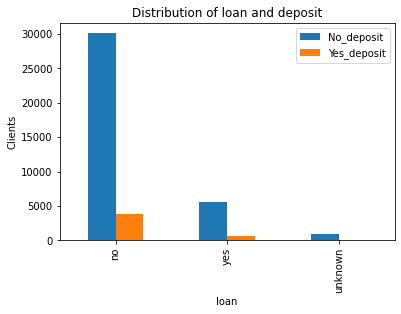

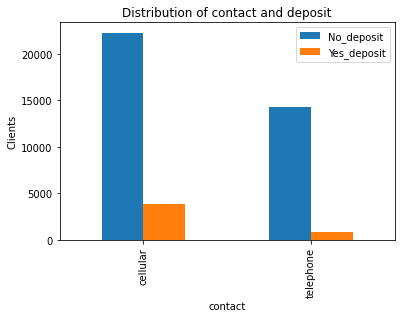

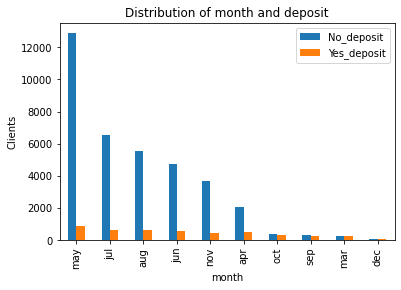

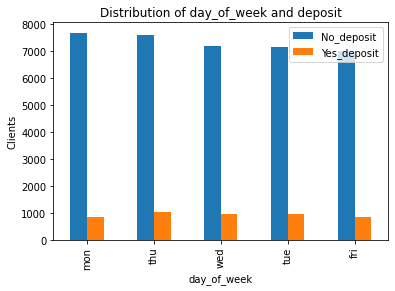

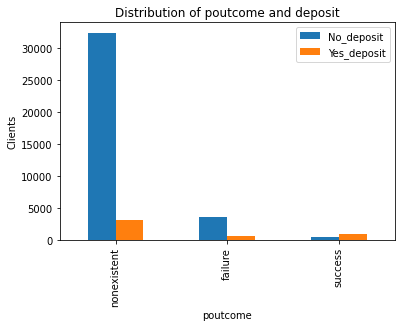

In [ ]:
bank_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']
for x in bank_cat:
    temp_1 = pd.DataFrame()
    temp_1['No_deposit'] = bank[bank['y'] == 'no'][x].value_counts()
    temp_1['Yes_deposit'] = bank[bank['y'] == 'yes'][x].value_counts()
    temp_1.plot(kind = 'bar')
    plt.xlabel(f'{x}')

    plt.ylabel('Clients')
    plt.title('Distribution of {} and deposit'.format(x))
    plt.show()

## **Numerical Data Exploration**
---
Performing **numerical vs target** analysis
- Check for correlation between features and target
- Check for outliers in the dataset

### **Numerical Data Correlation**
---
- Bank's **client data** does not has a high correlation to the target.
- Data which has high correlation with the target is mostly comes from **external data**.
 - *'emp.var.rate'*
 - *'cons.conf.idx'*
 - *'euribor3m'*
 - *'cons.price.idx'*
 - *'nr.employed'*
- The main focus will be **utilizing fully bank's data** therefore, external data might be dropped after checking for multicolenariarity

In [ ]:
bank['y'] = bank['y'].map({'no' : 0, 'yes' : 1})
corr = bank.corr()
corr.style.background_gradient(cmap = 'PuBu')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


### **Outliers**
---
As hypotesed earlier, it is correct that some data (features) has outliers
 - *'age'*
 - *'campaign'*
 - *'cons.conf.idx'*

**Robust scaller** will be performed during data pre-processing to handle this outliers

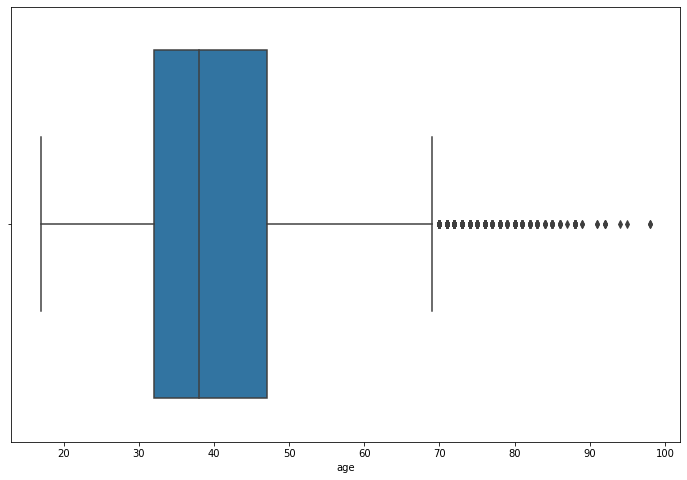

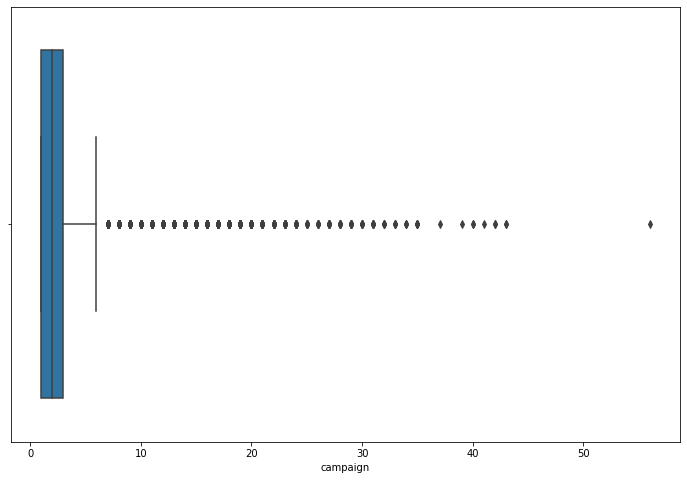

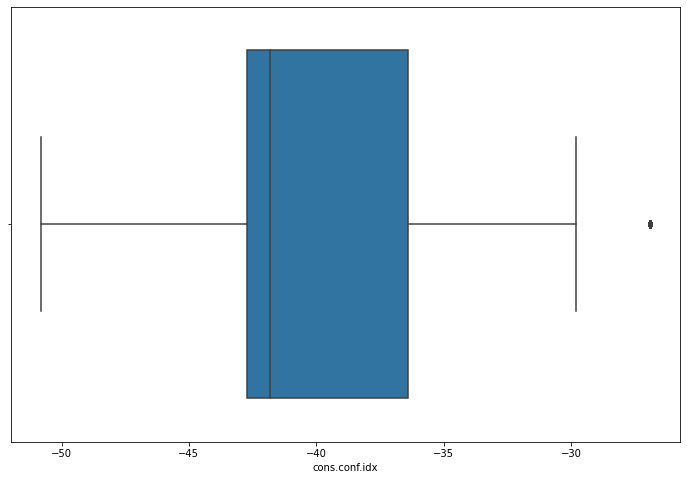

In [ ]:
outliers = ['age', 'campaign', 'cons.conf.idx']
for column in outliers:
  plt.figure(figsize = (12,8))
  sns.boxplot(data = bank, x = column, hue = 'y')
  plt.show()

# **Data Prepocessing**
---
After carefully analyzing the data and based on the EDA result, the data can now be pre-processed before fitting into the model
- **Unknown data** will be treated as missing value, thus some **imputation** using **mode** will be done
- **Categorical data** will be encoded with `OneHotEncoding` and `Ordinal Encoding`
- **Numerical data** will be scalled using `Robust Scaller`

## **Handling Missing Value**
---
1. Replace any 'unknown' value with `np.NaN`
2. Fill those NaN value with its **mode**

In [ ]:
banknan = bank.replace('unknown', np.NaN)
display(banknan.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
banknan['job'].fillna(banknan['job'].mode().iloc[0], inplace = True)
banknan['marital'].fillna(banknan['marital'].mode().iloc[0], inplace = True)
banknan['education'].fillna(banknan['education'].mode().iloc[0], inplace = True)
banknan['default'].fillna(banknan['default'].mode().iloc[0], inplace = True)
banknan['housing'].fillna(banknan['housing'].mode().iloc[0], inplace = True)
banknan['loan'].fillna(banknan['loan'].mode().iloc[0], inplace = True)

In [ ]:
display(banknan.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## **Assumption**
---


Applying some assumptions,


*   Previous outcome of campaign result (**poutcome** features)  : **nonexistent** result = **failure** result (since both didn't open term deposit)
*   Number of days that passed by after the client was last contacted from a previous campaign (**pdays** feature) : **999** (haven't been conatacted) = **0** (contacted yesterday)
*   Number of contacts performed before this campaign and for this client : **1** had been contacted and 0 for never been contacted



In [ ]:
banknan['poutcome'] = banknan['poutcome'].replace('nonexistent', 'failure')
banknan['pdays'] = banknan['pdays'].replace(999, 0)
banknan['previous'] = banknan['previous'].apply(lambda x: 'yes' if x > 0 else 'no')

## **Final Data Cleansing**
---
- Dropping duplicate data

In [ ]:
banknan.drop_duplicates(inplace = True)
display(banknan.head())
display(banknan.shape)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,no,failure,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,0,no,failure,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,no,failure,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,no,failure,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,no,failure,1.1,93.994,-36.4,4.857,5191.0,0


(41174, 21)

## **Dataset Splitting**
---

In [ ]:
X = banknan.drop(columns = ['y'], axis = 1)
y = banknan['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 2021)

## **Feature Selection**
---
1. Performing Chi-Squared test on the categorical data
2. Performing F-Statistics test on the numerical data
3. Plot correlation heatmap between numerical data

In [ ]:
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [ ]:
X_train_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'previous', 'poutcome'],
      dtype='object')

In [ ]:
X_train_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### **Chi-Squared Test**
---

Hypothesis testing for 2 categorical variables with pre-assumption:

*   Ho : both variables are independent
*   Ha : both variables are dependent


with **α = 0.05**, means if the p-value < α, then the hypotesis null (Ho) is neglected thus the feature **will not** be removed

In [ ]:
chi2_check = {}

for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

In [ ]:
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,p-value
0,job,0.000000
1,marital,0.000000
2,education,0.000000
3,contact,0.000000
4,month,0.000000
5,previous,0.000000
6,poutcome,0.000000
7,day_of_week,0.000001
8,housing,0.204795
9,loan,0.429393


We will try to drop **housing**, **loan**, dan **default** because its' p-value > α 

### **F-Statistic Test**
---
Hypothesis testing for two numerical feature, whether the independent variable affects the dependent variable or not. Pre-assumption:

*   Ho : independent variable is not significantly affect the dependent variable
*   Ha : independent variable is significantly affect the dependent variable


with **α = 0.05**, means if the p-value < α, then the hypotesis null (Ho) is neglected thus the feature **will not** be removed

In [ ]:
F_statistic, p_values = f_classif(X_train_num, y_train)

In [ ]:
# convert to a DataFrame
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values,
					'F-Score': F_statistic, 'p values': p_values.round(decimals = 3)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)

In [ ]:
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,duration,6397.335433,0.0
1,nr.employed,4748.337572,0.0
2,euribor3m,3491.897564,0.0
3,emp.var.rate,3273.435937,0.0
4,pdays,2568.265891,0.0
5,cons.price.idx,660.447528,0.0
6,campaign,133.804577,0.0
7,cons.conf.idx,96.119260,0.0
8,age,31.687958,0.0


We keep all features since its' p values < α. 

The F-Score present how variative the variance of the variable

In [ ]:
X_train_num = X_train.select_dtypes(include = 'number').copy()
corr = X_train_num.corr()
corr.style.background_gradient(cmap = 'PuBu')

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.001400,0.002268,0.022788,0.001577,0.007176,0.128357,0.011471,-0.019398
duration,0.001400,1.000000,-0.069190,0.049184,-0.028899,0.004735,-0.003850,-0.033169,-0.045914
campaign,0.002268,-0.069190,1.000000,-0.041998,0.149922,0.124845,-0.008382,0.134948,0.142983
pdays,0.022788,0.049184,-0.041998,1.000000,-0.220320,-0.046813,0.067030,-0.251583,-0.321190
emp.var.rate,0.001577,-0.028899,0.149922,-0.220320,1.000000,0.776605,0.197233,0.972405,0.907393
cons.price.idx,0.007176,0.004735,0.124845,-0.046813,0.776605,1.000000,0.061200,0.690243,0.524227
cons.conf.idx,0.128357,-0.003850,-0.008382,0.067030,0.197233,0.061200,1.000000,0.279359,0.101260
euribor3m,0.011471,-0.033169,0.134948,-0.251583,0.972405,0.690243,0.279359,1.000000,0.945070
nr.employed,-0.019398,-0.045914,0.142983,-0.321190,0.907393,0.524227,0.101260,0.945070,1.000000


In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X_train_num).sort_values('VIF')

,variables,VIF
3,pdays,1.189057
2,campaign,1.919240
1,duration,2.010688
0,age,15.992227
4,emp.var.rate,29.124178
6,cons.conf.idx,119.550062
7,euribor3m,226.585315
5,cons.price.idx,22266.223143
8,nr.employed,26231.315752


We will try to drop **emp.var.rate, cons.conf.idx, euribor3m, cons.price.idx, nr.employed** because VIF > 10 and base on heatmap correlation, these features have the value almost 1 (multicolinearity). \
We dont drop the feature **Age** since its' correlation is not high with other independent variables

In [ ]:
X_test.drop(columns = ['housing', 'loan', 'default', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'cons.price.idx', 'nr.employed'], axis = 1, inplace=True)
X_train.drop(columns = ['housing', 'loan', 'default', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'cons.price.idx', 'nr.employed'], axis = 1, inplace=True)
X_train.head(5)

,age,job,marital,education,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
39151,30,technician,married,professional.course,cellular,mar,tue,263,2,6,yes,success
36891,25,student,single,university.degree,telephone,jun,thu,280,6,0,yes,failure
19703,30,admin.,single,university.degree,cellular,aug,thu,1336,4,0,no,failure
17977,34,services,married,high.school,telephone,jul,tue,157,6,0,no,failure
15478,24,blue-collar,single,basic.9y,cellular,jul,fri,659,5,0,no,failure


## **Feature Engineering**
---
After all features are firmed to be used based on statistical evaluation (chi-squared and f-statistic), they can be further process before fitted into the model
1. Perform encoding for categorical features (OneHotEncoding and Ordinal)
2. Perform scalling for numerical features (Robust Scaller)

In [ ]:
one_hot_encoder = ['job', 'marital', 'contact', 'month', 'day_of_week', 'previous', 'poutcome']
robust_scaler = ['age', 'duration', 'campaign', 'pdays']

ordinal_mapping = [
    {'col':'education',
    'mapping':{'illiterate':1,'basic.4y':2,'basic.6y':3,'basic.9y':4,'high.school':5,'professional.course':6,'university.degree':7}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = 'education', mapping = ordinal_mapping)

transformer = ColumnTransformer([
                                 ('one hot encoder', OneHotEncoder(), one_hot_encoder),
                                 ('ordinal encoder', ordinal_encoder, ['education']),
                                 ('robust scaler', RobustScaler(), robust_scaler)
                                ], remainder = 'passthrough')

X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [ ]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,-0.533333,0.382488,0.0,6.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,-0.866667,0.460829,2.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0,-0.533333,5.327189,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,-0.266667,-0.105991,2.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,-0.933333,2.207373,1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,7.0,0.600000,6.737327,0.0,0.0
32935,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0,1.066667,-0.700461,3.0,0.0
32936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,-0.200000,1.995392,-0.5,0.0
32937,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0,-0.133333,-0.184332,0.0,0.0


In [ ]:
transformer.transformers_

[('one hot encoder',
  OneHotEncoder(),
  ['job',
   'marital',
   'contact',
   'month',
   'day_of_week',
   'previous',
   'poutcome']),
 ('ordinal encoder', OrdinalEncoder(cols=['education'],
                 mapping=[{'col': 'education',
                           'mapping': {'basic.4y': 2, 'basic.6y': 3,
                                       'basic.9y': 4, 'high.school': 5,
                                       'illiterate': 1, 'professional.course': 6,
                                       'university.degree': 7}}]), ['education']),
 ('robust scaler', RobustScaler(), ['age', 'duration', 'campaign', 'pdays'])]

In [ ]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_admin.', 'x0_blue-collar', 'x0_entrepreneur', 'x0_housemaid',
       'x0_management', 'x0_retired', 'x0_self-employed', 'x0_services',
       'x0_student', 'x0_technician', 'x0_unemployed', 'x1_divorced',
       'x1_married', 'x1_single', 'x2_cellular', 'x2_telephone', 'x3_apr',
       'x3_aug', 'x3_dec', 'x3_jul', 'x3_jun', 'x3_mar', 'x3_may',
       'x3_nov', 'x3_oct', 'x3_sep', 'x4_fri', 'x4_mon', 'x4_thu',
       'x4_tue', 'x4_wed', 'x5_no', 'x5_yes', 'x6_failure', 'x6_success'],
      dtype=object)

In [ ]:
transformer.transformers_[1][1].get_feature_names()

['education']

In [ ]:
features = list(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_thu',
       'day_tue', 'day_wed', 'previous_no', 'previous_yes', 'poutcome_failure', 'poutcome_success', 'education_encoded', 'age_scaled', 'duration_scaled', 'campaign_scaled', 'pdays_scaled'])

In [ ]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,previous_no,previous_yes,poutcome_failure,poutcome_success,education_encoded,age_scaled,duration_scaled,campaign_scaled,pdays_scaled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,-0.533333,0.382488,0.0,6.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,-0.866667,0.460829,2.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0,-0.533333,5.327189,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,-0.266667,-0.105991,2.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,-0.933333,2.207373,1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,7.0,0.600000,6.737327,0.0,0.0
32935,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0,1.066667,-0.700461,3.0,0.0
32936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,-0.200000,1.995392,-0.5,0.0
32937,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0,-0.133333,-0.184332,0.0,0.0


Notes:
1. Running model performance dulu sebelum handling imbalance

## **Handling Imbalance Data**
---
Both undersampling and oversampling will be tried to evaluate which methodology works best for the dataset
1. **Undersampling** method: **NearMiss**
2. **Oversampling** means making duplicates of the data that is the least present in your data set. Method: **SMOTE**

**Near Miss** refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

In [ ]:
#Undersampling with Nearmiss
near = NearMiss()
X_under, y_under = near.fit_resample(X_train_preprocessed, y_train)
X_under.shape

(7422, 40)

**SMOTE** or Synthetic Minority Oversampling Technique is an algorithm that performs data augmentation by creating synthetic data points based on the original data points. The advantage of SMOTE is that you are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points.

In [ ]:
#Oversampling with SMOTE
smote = SMOTE()
X_over, y_over = smote.fit_resample(X_train_preprocessed, y_train)
X_over.shape

(58456, 40)

Note:
1. Inspek untuk cara kerja NearMiss dan Smote
2. Mainin derejat samplingnya 100% balance, 70% balance, 50% balance

# **<h1>Modeling**
---
- Various machine learning algorithm will be test to see which one of those perform best for the dataset
  1. Logistic Regression \
  2. Random Forest \
  3. K-Nearest Neighbours \
  4. Decision Tree \
  5. Bagging with SGD Classifier  \
  6. SGD Classifier

- The modeling will be done in 3 phase using **fresh preprocessed data**, **undersampled data**, and **oversampled data**

- Each **model parameters** will be tuned using `GridSearchCV`

- Model performace will be evaluated using **precision** and **ROC-AUC**

**Precision** is chosen for evaluated model performance in this project because the assumption of all clients are going to open term deposit. After that, we mark the client that won't open term deposit. In this scenario, the bank needs more capital dan effort, but will eventually more profittable if the precision score is high enough (knowing the best client profile).

## **Modeling Algorithm**
---

In [ ]:
'''Build pipline of classifiers'''
# set all CPU
n_jobs = -1
# LogisticRegression
pipe_lr = Pipeline([('lr', LogisticRegression(random_state = 2021, n_jobs=n_jobs, max_iter=500))])
# RandomForestClassifier
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state = 2021, oob_score=True, n_jobs=n_jobs))])
# KNeighborsClassifier
pipe_knn = Pipeline([('knn', KNeighborsClassifier(n_jobs=n_jobs))])
# DecisionTreeClassifier
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state = 2021, max_features='auto'))])
# BaggingClassifier
# note we use SGDClassifier as classier inside BaggingClassifier
pipe_bag = Pipeline([('bag',BaggingClassifier(base_estimator=SGDClassifier(random_state = 2021, n_jobs=n_jobs, max_iter=1500),\
                                              random_state = 2021,oob_score=True,n_jobs=n_jobs))])
# SGDClassifier
pipe_sgd = Pipeline([('sgd', SGDClassifier(random_state = 2021, n_jobs=n_jobs, max_iter=1500))])

In [ ]:
'''Set parameters for Grid Search '''
# set number 
cv = StratifiedKFold(shuffle=True, n_splits=5, random_state = 2021)
# set for LogisticRegression
grid_params_lr = [{
                'lr__penalty': ['l2'],
                'lr__C': [0.3, 0.6, 0.7],
                'lr__solver': ['sag']
                }]
# set for RandomForestClassifier
grid_params_rf = [{
                'rf__criterion': ['entropy'],
                'rf__min_samples_leaf': [80, 100],
                'rf__max_depth': [25, 27],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [60, 70]
                }]
# set for KNeighborsClassifier
grid_params_knn = [{'knn__n_neighbors': [16,17,18]}]

# set for DecisionTreeClassifier
grid_params_dt = [{
                'dt__max_depth': [8, 10],
                'dt__min_samples_leaf': [1, 3, 5, 7]
                  }]
# set for BaggingClassifier
grid_params_bag = [{'bag__n_estimators': [10, 15, 20]}]

# set for SGDClassifier
grid_params_sgd = [{
                    'sgd__loss': ['log', 'modified_huber'],
                    'sgd__learning_rate': ['adaptive'],
                    'sgd__eta0': [0.001, 0.01, 0.1],
                    'sgd__penalty': ['l1', 'l2', 'elasticnet'], 
                    'sgd__alpha':[0.1, 1, 5, 10]
                    }]

In [ ]:
'''Grid search objects'''
# for LogisticRegression
gs_lr = GridSearchCV(pipe_lr, param_grid=grid_params_lr,
                     scoring='precision', cv=cv) 
# for RandomForestClassifier
gs_rf = GridSearchCV(pipe_rf, param_grid=grid_params_rf,
                     scoring='precision', cv=cv)
# for KNeighborsClassifier
gs_knn = GridSearchCV(pipe_knn, param_grid=grid_params_knn,
                     scoring='precision', cv=cv)
# for DecisionTreeClassifier
gs_dt = GridSearchCV(pipe_dt, param_grid=grid_params_dt,
                     scoring='precision', cv=cv)
# for BaggingClassifier
gs_bag = GridSearchCV(pipe_bag, param_grid=grid_params_bag,
                     scoring='precision', cv=cv)
# for SGDClassifier
gs_sgd = GridSearchCV(pipe_sgd, param_grid=grid_params_sgd,
                     scoring='precision', cv=cv)

In [ ]:
# models that we iterate over
look_for = [gs_lr, gs_rf, gs_knn, gs_dt, gs_bag, gs_sgd]
# dict for later use 
model_dict = {0:'Logistic_reg', 1:'RandomForest', 2:'Knn', 3:'DesionTree', 4:'Bagging with SGDClassifier', 5:'SGD Class'}

## **Without Sampling (Imbalance Data)**
---

In [ ]:
#Imbalance Model with X_train_preprocessed, X_test_preprocessed, y_train, y_test
''' Function to iterate over models and obtain results'''
# set empty dicts and list
result_pre_imb = {}
result_auc_imb = {}
models = []

for index, model in enumerate(look_for):
        start = time.time()
        print()
        print('+++++++ Start New Model ++++++++++++++++++++++')
        print('Estimator is {}'.format(model_dict[index]))
        model.fit(X_train_preprocessed, y_train)
        print('---------------------------------------------')
        print('best params {}'.format(model.best_params_))
        print('best score is {}'.format(model.best_score_))
        auc = roc_auc_score(y_test, model.predict_proba(X_test_preprocessed)[:,1])
        print('---------------------------------------------')
        print('ROC_AUC is {} and precision rate is {}'.format(auc, model.score(X_test_preprocessed, y_test)))
        end = time.time()
        print('It lasted for {} sec'.format(round(end - start, 3)))
        print('++++++++ End Model +++++++++++++++++++++++++++')
        print()
        print()
        models.append(model.best_estimator_)
        result_pre_imb[index] = model.best_score_
        result_auc_imb[index] = auc


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic_reg
---------------------------------------------
best params {'lr__C': 0.3, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
best score is 0.6534137504431199
---------------------------------------------
ROC_AUC is 0.9154145705818226 and precision rate is 0.6706586826347305
It lasted for 182.873 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 80, 'rf__min_samples_split': 3, 'rf__n_estimators': 70}
best score is 0.7340902570186111
---------------------------------------------
ROC_AUC is 0.9240922586041727 and precision rate is 0.7816593886462883
It lasted for 130.508 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is Knn
----------------------------------

## **Undersample Dataset**
---


In [ ]:
#Undersample Model
X_train_under, X_under, y_train_under, y_under = train_test_split(
    X_under,
    y_under, 
    stratify = y_under,
    test_size = 0.25, 
    random_state = 2021)

In [ ]:
''' Function to iterate over models and obtain results'''
# set empty dicts and list
result_pre_under = {}
result_auc_under = {}
models = []

for index, model in enumerate(look_for):
        start = time.time()
        print()
        print('+++++++ Start New Model ++++++++++++++++++++++')
        print('Estimator is {}'.format(model_dict[index]))
        model.fit(X_train_under, y_train_under)
        print('---------------------------------------------')
        print('best params {}'.format(model.best_params_))
        print('best score is {}'.format(model.best_score_))
        auc = roc_auc_score(y_under, model.predict_proba(X_under)[:,1])
        print('---------------------------------------------')
        print('ROC_AUC is {} and precision rate is {}'.format(auc, model.score(X_under, y_under)))
        end = time.time()
        print('It lasted for {} sec'.format(round(end - start, 3)))
        print('++++++++ End Model +++++++++++++++++++++++++++')
        print()
        print()
        models.append(model.best_estimator_)
        result_pre_under[index] = model.best_score_
        result_auc_under[index] = auc


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic_reg
---------------------------------------------
best params {'lr__C': 0.3, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
best score is 0.8373116759272257
---------------------------------------------
ROC_AUC is 0.9143690546967895 and precision rate is 0.8491228070175438
It lasted for 21.294 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 100, 'rf__min_samples_split': 3, 'rf__n_estimators': 70}
best score is 0.8357000531939534
---------------------------------------------
ROC_AUC is 0.8931418837321641 and precision rate is 0.8523748395378691
It lasted for 37.54 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is Knn
------------------------------------

## **Oversample Dataset**
---

In [ ]:
#Oversample Model
X_train_over, X_over, y_train_over, y_over = train_test_split(
    X_over,
    y_over, 
    stratify = y_over,
    test_size = 0.25, 
    random_state = 2021)

In [ ]:
''' Function to iterate over models and obtain results'''
# set empty dicts and list
result_pre_over = {}
result_auc_over = {}
models = []

for index, model in enumerate(look_for):
        start = time.time()
        print()
        print('+++++++ Start New Model ++++++++++++++++++++++')
        print('Estimator is {}'.format(model_dict[index]))
        model.fit(X_train_over, y_train_over)
        print('---------------------------------------------')
        print('best params {}'.format(model.best_params_))
        print('best score is {}'.format(model.best_score_))
        auc = roc_auc_score(y_over, model.predict_proba(X_over)[:,1])
        print('---------------------------------------------')
        print('ROC_AUC is {} and precision rate is {}'.format(auc, model.score(X_over, y_over)))
        end = time.time()
        print('It lasted for {} sec'.format(round(end - start, 3)))
        print('++++++++ End Model +++++++++++++++++++++++++++')
        print()
        print()
        models.append(model.best_estimator_)
        result_pre_over[index] = model.best_score_
        result_auc_over[index] = auc


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic_reg
---------------------------------------------
best params {'lr__C': 0.7, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
best score is 0.8537302914696845
---------------------------------------------
ROC_AUC is 0.9198425786484478 and precision rate is 0.855701877276548
It lasted for 26.141 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 80, 'rf__min_samples_split': 3, 'rf__n_estimators': 60}
best score is 0.8766819459558594
---------------------------------------------
ROC_AUC is 0.9649183816924438 and precision rate is 0.8772872680742162
It lasted for 237.309 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is Knn
------------------------------------

## **Initial Model Training Summary**
---
1. The model **performed better** with **oversample dataset**
2. **RandomForest** algoritm is **the best performer** compared to other algorithm
 - The algoritm can generalized the data well

In [ ]:
""" Model performance during Grid Search """
pd.DataFrame(list(zip(model_dict.values(), result_pre_imb.values(), result_pre_under.values(), result_pre_over.values(), result_auc_imb.values(), result_auc_under.values(), result_auc_over.values())), \
                  columns=['Model', 'Precision_rate_imb', 'Precision_rate_under', 'Precision_rate_over', 'Roc_auc_rate_imb', 'Roc_auc_rate_under', 'Roc_auc_rate_over'])

,Model,Precision_rate_imb,Precision_rate_under,Precision_rate_over,Roc_auc_rate_imb,Roc_auc_rate_under,Roc_auc_rate_over
0,Logistic_reg,0.653414,0.837312,0.853730,0.915415,0.914369,0.919843
1,RandomForest,0.734090,0.835700,0.876682,0.924092,0.893142,0.964918
2,Knn,0.652020,0.902806,0.859036,0.894333,0.888636,0.960353
3,DesionTree,0.624795,0.840410,0.842976,0.883171,0.850231,0.919582
4,Bagging with SGDClassifier,0.658277,0.851656,0.848211,0.786512,0.893079,0.895046
5,SGD Class,0.663430,0.841990,0.873427,0.913427,0.906891,0.881601


With sampling, the performance of **Precision** score and **ROC_AUC** score outperform the data without sampling. Comparing the result for **Random Forest Classifier** as the best performer,

*   Without sampling to undersampling (about 10% for **Precision** score)
*   Without sampling to oversampling (about 14% for **Precision** score and 4% for **ROC_AUC** score)



In [ ]:
model_dict.values()

dict_values(['Logistic_reg', 'RandomForest', 'Knn', 'DesionTree', 'Bagging with SGDClassifier', 'SGD Class'])

In [ ]:
result_pre_over.values()

dict_values([0.8537302914696845, 0.8766819459558594, 0.8590363176628983, 0.8429762764055931, 0.8482106218120732, 0.8734266360720426])

In [ ]:
result_auc_over.values()

dict_values([0.9198425786484478, 0.9649183816924438, 0.9603533932425284, 0.9195818479195361, 0.8950464607699894, 0.8816006982586556])

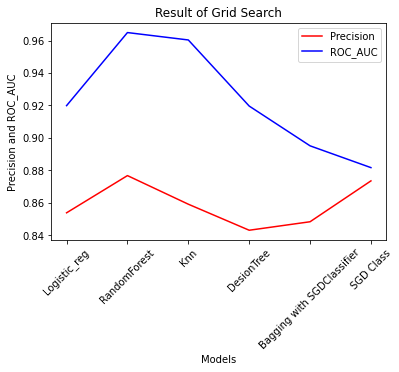

In [ ]:
model_dummy = ['Logistic_reg', 'RandomForest', 'Knn', 'DesionTree', 'Bagging with SGDClassifier', 'SGD Class']
result_pre_over_dummy = [0.8537302914696845, 0.8766819459558594, 0.8590363176628983, 0.8429762764055931, 0.8482106218120732, 0.8734266360720426]
result_auc_over_dummy = [0.9198425786484478, 0.9649183816924438, 0.9603533932425284, 0.9195818479195361, 0.8950464607699894, 0.8816006982586556]
plt.plot(model_dummy, result_pre_over_dummy, c='r')
plt.plot(model_dummy, result_auc_over_dummy, c='b')
plt.xlabel('Models')
plt.xticks(rotation = 45)
plt.ylabel('Precision and ROC_AUC')
plt.title('Result of Grid Search')
plt.legend(['Precision', 'ROC_AUC'])
plt.show();

## **Hyperparameter Tuning**
---
Further increasing the model performance, the RandomForest algoritm will be tuned using `GridSearchCV`
Best params value is as follow:
- OOB: **0.905**
- N_estimators: **185**

100%|██████████| 39/39 [03:14<00:00,  4.98s/it]


'max oob 0.9049085351945623 and number of estimators 185'

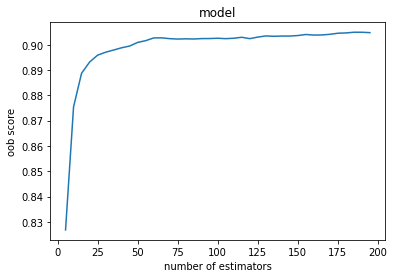

In [ ]:
def graph(model, X_train, y_train):
    obb = []
    est = list(range(5, 200, 5))
    for i in tqdm(est):
        random_forest = model(n_estimators=i, criterion='entropy', random_state=2021, oob_score=True, n_jobs=-1, \
                           max_depth=25, min_samples_leaf=80, min_samples_split=3,)
        random_forest.fit(X_train, y_train)
        obb.append(random_forest.oob_score_)
    display('max oob {} and number of estimators {}'.format(max(obb), est[np.argmax(obb)]))
    plt.plot(est, obb)
    plt.title('model')
    plt.xlabel('number of estimators')
    plt.ylabel('oob score')
    plt.show();

graph(RandomForestClassifier, X_train_over, y_train_over)

## **Model Performance Visualization**

In [ ]:
''' Build graph for ROC_AUC '''

fpr, tpr, threshold = roc_curve(y_over, models[1].predict_proba(X_over)[:,1])
                                        
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    text=threshold,
    fill='tozeroy',
    name='ROC Curve')

trace1 = go.Scatter(
    x=[0,1],
    y=[0,1],
    line={'color': 'red', 'width': 1, 'dash': 'dash'},
    name='Baseline')

data = [trace0, trace1]

layout = go.Layout(
    title='ROC Curve',
    xaxis={'title': 'False Positive Rate'},
    yaxis={'title': 'True Positive Rate'})

fig = go.Figure(data, layout)
fig.show();

Curve is well distributed with tendency to False Positive Rate

## **Feature Importance**
---
1. Call duration
2. Campaign performed
3. Contact type - Telephone
4. Campaign month - May
5. The outcome of previous campaign

Based on the analysis and model learning, those 4 points contribute largely to how a customer will open the term deposit. 

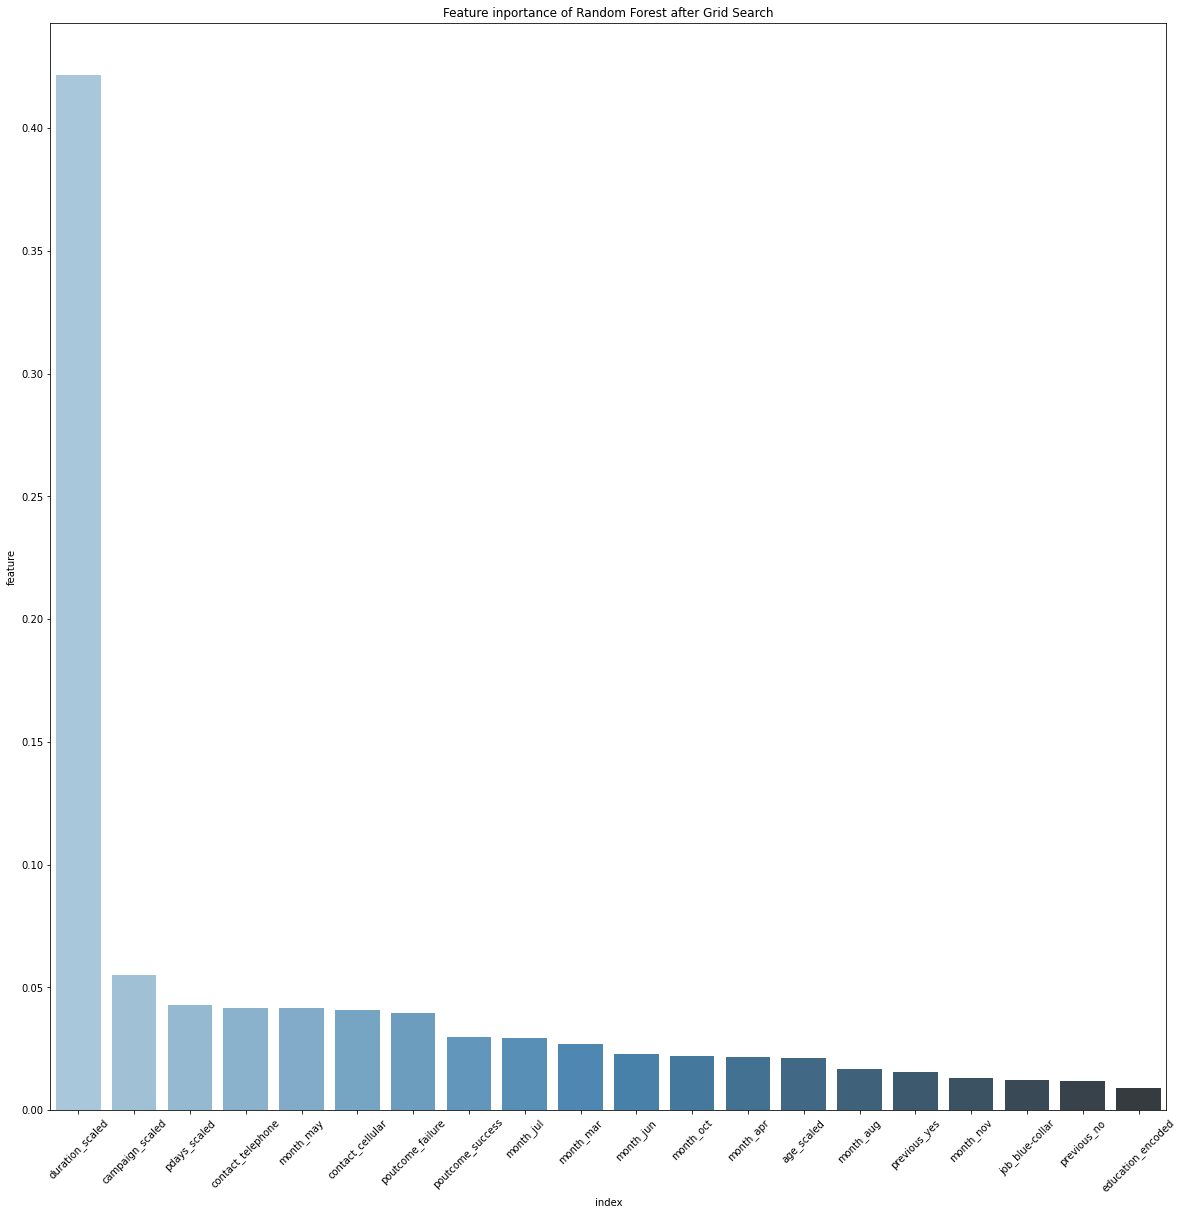

In [ ]:
''' Build bar plot of feature importance of the best model '''

def build_feature_importance(model, X_train, y_train):
    
    models = RandomForestClassifier(criterion='entropy', random_state=2021, oob_score=True, n_jobs=-1, \
                           max_depth=25, min_samples_leaf=80, min_samples_split=3, n_estimators=185)
    models.fit(X_train, y_train)
    data = pd.DataFrame(models.feature_importances_, X_train.columns, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[20,20])
    sns.barplot(x='index', y='feature', data=data[:20], palette="Blues_d")
    plt.title('Feature inportance of Random Forest after Grid Search')
    plt.xticks(rotation=45)
    plt.show();
    
build_feature_importance(RandomForestClassifier, X_train_over, y_train_over)

# **Project Summary**
---


1. Portuguese bank marketing dataset taken from **May 2008 until November 2010**, contains an **imbalance target** and full of insight lay down on its **categorical features**.

2. Performing **feature selection** and **engineering** help produce the best model to classify whether the customer will open the term deposit or not.

3. From the learning perspective, `RandomForest` algorithm is best suited to handle the problem with best parameters as follows:
  - **n_estimators**: 185
  - **oob**: 0.905 

<br>**Answering the business problem stated in the beginning**:
1. What kind of **customer characteristics** the marketing should target in order to increase term deposit opening? \
 
 **->** Turn-out that customer characteristics do not play a big role whether he or she will open the term-deposit, but how the marketing agent **maintain the call duration** is the most impactfull 

2. Are there any **specific conditions** that affect customer to open term deposit? \
 
 **->** **Call duration**, **month of campaign held**, **type of contact the marketing used** help increase the likelihood of a customer to open term deposit